<center><img src="Logolink_OP_VVV_hor_barva_cz.jpg" width="600px"/></center>
<center>ESF projekt Západočeské univerzity v Plzni reg. č. CZ.02.2.69/0.0/0.0/16 015/0002287</center>

# Introduction into computer vision

In [1]:
import scipy
import scipy.misc
import skimage
import skimage.io
import numpy as np
import urllib
#import cStringIO
import matplotlib.pyplot as plt
import skimage.color
import cv2

In [ ]:
%pylab inline --no-import-all

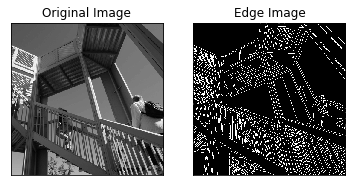

In [2]:
from skimage import feature
lena = scipy.misc.ascent().astype(np.uint8)

edges = feature.canny(lena)

plt.subplot(121),plt.imshow(lena,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

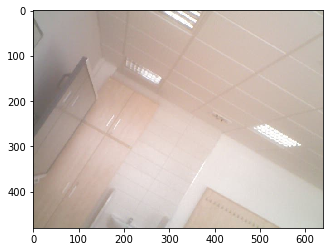

In [3]:
URL = "http://uc452cam01-kky.fav.zcu.cz/snapshot.jpg"
# URL = "http://plzen.cz/kamera.php?0.8989779513794929"
# URL = "http://www.chmi.cz/files/portal/docs/meteo/kam/pribram.jpg"

im = skimage.io.imread(URL)
# im = skimage.io.imread(URL, as_grey=True)
plt.imshow(im)
plt.show()

In [4]:
def url_to_image(url):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)

    # return the image
    return image

In [6]:
#NEFUNGUJE V JUPYTERU
im = url_to_image(URL)
# im = skimage.io.imread(URL)
cv2.imshow('image', im)

-1

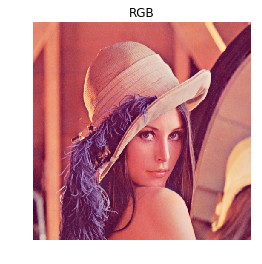

In [6]:
filename = './Lenna.png' # Cesta k obrazku
img = skimage.io.imread(filename) #nacteni obrazku
plt.title('RGB')
plt.axis('off')
plt.imshow(img)
plt.show()

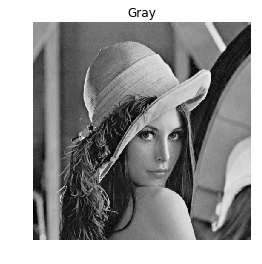

In [7]:
imggray = skimage.color.rgb2gray(img) #prevedeni do sedotonu
plt.title('Gray')
plt.axis('off')
plt.imshow(imggray, cmap='gray') #cmap
plt.show()

In [8]:
print (img.shape)
print (img[220,10,2])

(512, 512, 3)
78


In [9]:
img.shape

(512, 512, 3)

In [10]:
img[15:20,15:20,0]

array([[225, 226, 228, 229, 225],
       [227, 225, 227, 231, 227],
       [227, 227, 227, 226, 225],
       [229, 228, 227, 225, 225],
       [228, 228, 228, 229, 225]], dtype=uint8)

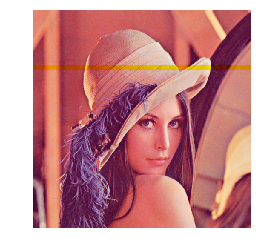

In [11]:
img[130:140,:, 2] = 0
plt.axis('off')
plt.imshow(img)
plt.show()

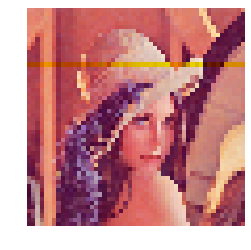

In [12]:
plt.axis('off')
plt.imshow(img[::10, ::10, :])
plt.show()

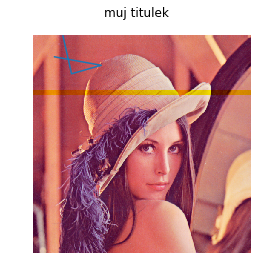

In [15]:
plt.axis('off')
plt.imshow(img)
plt.suptitle('muj titulek')
plt.plot([50,160,90,70], [50,70,90,1])
plt.savefig('./obrazek.png')
plt.show()

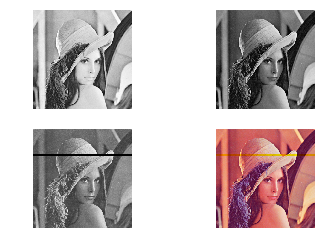

In [16]:
plt.axis('off')
plt.subplot(2,2,1)
plt.axis('off')
plt.imshow(img[:,:,0], cmap='gray')
plt.subplot(222)
plt.axis('off')
plt.imshow(img[:,:,1], cmap='gray')
plt.subplot(223)
plt.axis('off')
plt.imshow(img[:,:,2], cmap='gray')
plt.subplot(224)
plt.axis('off')
plt.imshow(img[:,:])

plt.show()

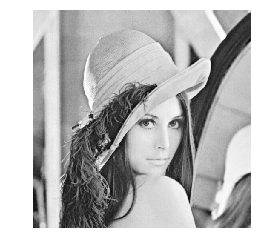

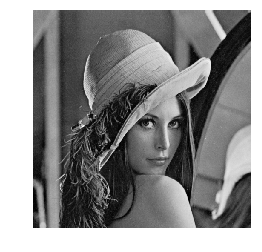

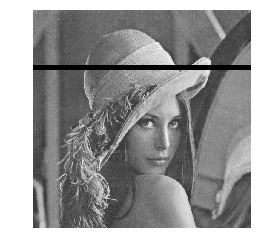

In [17]:
plt.figure()
plt.axis('off')
plt.imshow(img[:,:,0], cmap='gray')
plt.figure()
plt.axis('off')
plt.imshow(img[:,:,1], cmap='gray')
plt.figure()
plt.axis('off')
plt.imshow(img[:,:,2], cmap='gray')
plt.show()

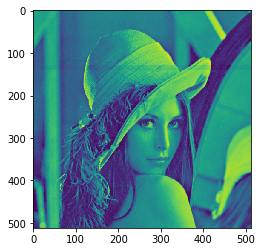

In [18]:
import skimage.color
img = skimage.color.rgb2gray(img)
plt.imshow(img)
plt.show()

In [19]:
duha = skimage.io.imread('http://pixabay.com/static/uploads/photo/2013/07/12/17/20/luck-152048_640.png')

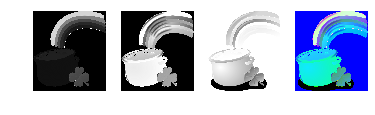

In [20]:
duha_hsv = skimage.color.rgb2hsv(duha[:,:,:3])
plt.subplot(141)
plt.axis('off')
plt.imshow(duha_hsv[:,:,0], cmap='gray')
plt.subplot(142)
plt.axis('off')
plt.imshow(duha_hsv[:,:,1], cmap='gray')
plt.subplot(143)
plt.axis('off')
plt.imshow(duha_hsv[:,:,2], cmap='gray')
plt.subplot(144)
plt.axis('off')
plt.imshow(duha_hsv, cmap = 'hsv')
plt.show()

red [RGB]     [1. 0. 0.]
unknown [RGB] [0.4 0.  0. ]
gray [RGB]    [0.4 0.4 0.4]
dist to red   0.6
dist to gray  0.5656854249492381


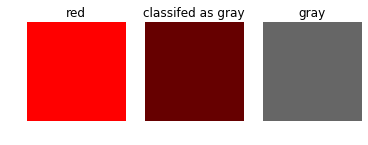

In [21]:
red = np.array([1.0,0.0,0.0])
gray = np.array([0.4, 0.4, 0.4])
unknown = np.array([0.4,0.0,0.0])

redsq =  red * np.ones([50,50,3])
graysq = gray * np.ones([50,50,3])
unknownsq = unknown * np.ones([50,50,3])

plt.subplot(131)
plt.axis('off')
plt.title('red')
plt.imshow(redsq)

plt.subplot(132)
plt.axis('off')
plt.title('classifed as gray')
plt.imshow(unknownsq)

plt.subplot(133)
plt.axis('off')
plt.title('gray')
plt.imshow(graysq)

print ("red [RGB]    ", red)
print ("unknown [RGB]", unknown)
print ("gray [RGB]   ", gray)
print ('dist to red  ', np.linalg.norm(unknown - red))
print ('dist to gray ', np.linalg.norm(unknown - gray))

red [HSV]     [0. 1. 1.]
unknown [HSV] [0.  1.  0.4]
gray [HSV]    [0.  0.  0.4]
dist to red   0.6
dist to gray  1.0


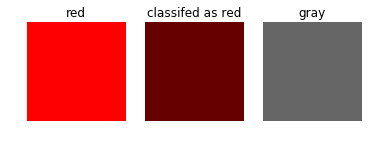

In [22]:
red_hsv = skimage.color.rgb2hsv(red.reshape(1,1,3))
gray_hsv = skimage.color.rgb2hsv(gray.reshape(1,1,3))
unknown_hsv = skimage.color.rgb2hsv(unknown.reshape(1,1,3))

print ("red [HSV]    ", red_hsv.squeeze())
print ("unknown [HSV]", unknown_hsv.squeeze())
print ("gray [HSV]   ", gray_hsv.squeeze())
print ('dist to red  ', np.linalg.norm(unknown_hsv - red_hsv))
print ('dist to gray ', np.linalg.norm(unknown_hsv - gray_hsv))
plt.subplot(131)
plt.axis('off')
plt.title('red')
plt.imshow(redsq)

plt.subplot(132)
plt.axis('off')
plt.title('classifed as red')
plt.imshow(unknownsq)

plt.subplot(133)
plt.axis('off')
plt.title('gray')
plt.imshow(graysq)